#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load Boston Dataset From sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [6]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [7]:
df['Price'] = boston.target

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
x = df.drop('Price', axis= 1)
y = df['Price']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

#### Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

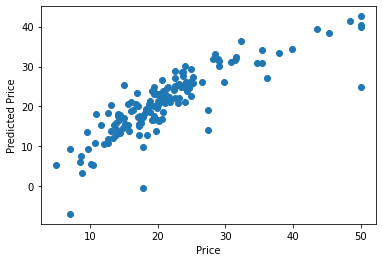

In [14]:
plt.scatter(y_test, pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [15]:
print(reg.score(x_test, y_test))

0.7112260057484903


In [18]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, pred)

In [19]:
print(mse)

21.517444231177432


In [20]:
print(metrics.mean_absolute_error(y_test, pred))

3.1627098714574253


### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cv_score = cross_val_score(reg, x, y, cv= 5)

In [23]:
np.mean(cv_score)

0.3532759243958823

### Regularization Regression

#### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso = Lasso(alpha= 0.1, normalize= True)

In [26]:
lasso.fit(x, y)

Lasso(alpha=0.1, normalize=True)

In [27]:
coef = lasso.coef_

In [28]:
print(coef)

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


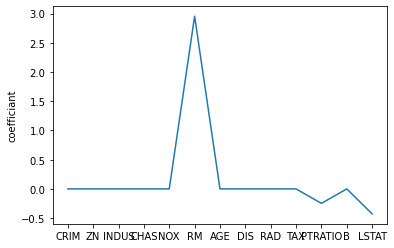

In [29]:
plt.plot(range(13), coef)
plt.xticks(range(13), boston.feature_names)
plt.ylabel('coefficiant')
plt.show()

#### Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [32]:
predict = ridge.predict(x_test)

In [33]:
mse_ridge = metrics.mean_squared_error(y_test, predict)

In [34]:
print(mse_ridge)

22.044053089861027
